# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 

import gensim as gm
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords, strip_numeric, strip_punctuation

from pprint import pprint
from imp import reload 
import time

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

C:\Users\rishi\AppData\Local\Temp\ipykernel_51760\2217762983.py:10: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


# Loading and Prepping Files

In [2]:
dataset = pd.read_csv('Final_Blog_Dataset.csv')
num_topics = len(list(dataset.topic.unique()))
print (num_topics)
dataset

39


raw_text  \
0                 Info has been found (+/- 100 pages,...   
1                 These are the team members:   Drewe...   
2                 In het kader van kernfusie op aarde...   
3                       testing!!!  testing!!!             
4                   Thanks to Yahoo!'s Toolbar I can ...   
...                                                  ...   
31493         Aug 7th Thur... Bought Her Mua Chee & S...   
31494         Aug 6th Wed.. Her 1st Day @ Work Back @...   
31495         Aug 4th Mon Zing's BD !! Went To Her Pl...   
31496         Aug 3rd Sun.. Went To Her Place B4 Goin...   
31497         Aug 1st Fri.. Met Her To Go Shoppin' @ ...   

                                              clean_text              topic  
0      info found pages files wait team leader proces...            Student  
1                        team members van mail mail mail            Student  
2      het van op build bomb rec humor subject build ...            Student  
3                                        testing testing            Student  
4      thanks yahoo capture means show cool links pop...  InvestmentBanking  
...                                                  ...                ...  
31493                              bought send home work        Advertising  
31494                            wed work sent work sent        Advertising  
31495  mon zing place cooked dinner together finally ...        Advertising  
31496  sun place zing present raffles centre double s...        Advertising  
31497                             met ping dinner breeks        Advertising  

[31498 rows x 3 columns]

In [3]:
dataset_clean = pd.DataFrame(dataset['clean_text'])    #For working

print (dataset_clean.shape)
print (dataset_clean.index)
print (dataset_clean.columns)
print()

dataset_clean.rename(columns = {'clean_text':'text'}, inplace = True)
print (dataset_clean["text"].isna().any())
print (dataset_clean["text"].isnull().sum())
print()

dataset_clean

(31498, 1)
RangeIndex(start=0, stop=31498, step=1)
Index(['clean_text'], dtype='object')

False
0



text
0      info found pages files wait team leader proces...
1                        team members van mail mail mail
2      het van op build bomb rec humor subject build ...
3                                        testing testing
4      thanks yahoo capture means show cool links pop...
...                                                  ...
31493                              bought send home work
31494                            wed work sent work sent
31495  mon zing place cooked dinner together finally ...
31496  sun place zing present raffles centre double s...
31497                             met ping dinner breeks

[31498 rows x 1 columns]

In [4]:
#Creating list of lists
from nltk.tokenize import word_tokenize, sent_tokenize

df = dataset_clean['text'].values.tolist()
for m, i in enumerate(df):
    df[m] = word_tokenize(df[m])

df

[['info',
  'found',
  'pages',
  'files',
  'wait',
  'team',
  'leader',
  'processed',
  'learns'],
 ['team', 'members', 'van', 'mail', 'mail', 'mail'],
 ['het',
  'van',
  'op',
  'build',
  'bomb',
  'rec',
  'humor',
  'subject',
  'build',
  'bomb',
  'humorous',
  'date',
  'organization',
  'university',
  'western',
  'original',
  'file',
  'dated',
  'transcript',
  'seven',
  'days',
  'article',
  'poorly',
  'formatted',
  'corrupted',
  'added',
  'text',
  'examine',
  'microscope',
  'malleable',
  'gold',
  'missing',
  'full',
  'text',
  'please',
  'distribute',
  'responsible',
  'accuracy',
  'information',
  'converted',
  'spell',
  'checking',
  'minor',
  'edits',
  'stolen',
  'voyager',
  'net',
  'fun',
  'bomb',
  'reformatted',
  'validates',
  'strict',
  'build',
  'bomb',
  'owning',
  'bomb',
  'kind',
  'challenge',
  'real',
  'seek',
  'wants',
  'passive',
  'victim',
  'nuclear',
  'war',
  'effort',
  'active',
  'participant',
  'bomb',
  'sh

# Topic Modeling

In [5]:
# Create Dictionary
id2word = corpora.Dictionary(df)    #Bag of Words approach

# Create Corpus
texts = df

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(7, 1), (9, 3), (10, 1), (11, 1)],
 [(1, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 4),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 4),
  (36, 2),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 3),
  (43, 2),
  (44, 1),
  (45, 2),
  (46, 4),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 6),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 4),
  (68, 3),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 5),
  (83, 2),
  (84, 1),
  (85, 4),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1)

In [6]:
from pprint import pprint

start_time = time.time()

# Build LDA model
lda_model = gm.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, alpha='auto', eta='auto', minimum_probability=0.05, random_state=0, passes=4)

end_time = time.time() - start_time
print ("Time taken to build the LDA model: " + str(end_time))

Time taken to build the LDA model: 209.26495814323425


In [7]:
#Generating a list of lists containing the top 15 terms for each topic

topic_words = []
for topic, terms in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=15):
    topic_words.append(lda_model.print_topic(topic, 15))
    
for i in range (len(topic_words)):
    print (i+1)
    print (topic_words[i])
    print()

1
0.078*"dream" + 0.028*"letter" + 0.027*"dreams" + 0.025*"captain" + 0.022*"shall" + 0.018*"letters" + 0.017*"hearts" + 0.015*"fears" + 0.013*"daddy" + 0.012*"sky" + 0.010*"dreaming" + 0.010*"fake" + 0.009*"stars" + 0.009*"sight" + 0.009*"museum"

2
0.058*"song" + 0.028*"songs" + 0.020*"music" + 0.018*"album" + 0.018*"matt" + 0.017*"band" + 0.015*"sing" + 0.012*"new" + 0.012*"good" + 0.012*"guitar" + 0.011*"show" + 0.011*"concert" + 0.011*"singing" + 0.010*"listen" + 0.009*"great"

3
0.183*"de" + 0.121*"la" + 0.051*"en" + 0.050*"el" + 0.028*"las" + 0.027*"fox" + 0.026*"para" + 0.021*"un" + 0.020*"mi" + 0.017*"del" + 0.017*"lang" + 0.016*"pa" + 0.015*"con" + 0.015*"ba" + 0.012*"si"

4
0.010*"person" + 0.010*"pain" + 0.009*"eyes" + 0.009*"hurt" + 0.008*"face" + 0.008*"words" + 0.007*"friend" + 0.007*"head" + 0.006*"felt" + 0.006*"people" + 0.006*"heart" + 0.005*"hand" + 0.005*"girl" + 0.005*"man" + 0.005*"asked"

5
0.141*"library" + 0.047*"card" + 0.046*"video" + 0.042*"blah" + 0.022*"c

In [8]:
pyLDAvis.enable_notebook()

#Feeding the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=id2word)

vis = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=id2word)
pyLDAvis.enable_notebook()
    
pyLDAvis.save_html(vis, './_' + str(100) + '.html')
pyLDAvis.display(vis)

# Model Evaluation and Visualization

In [9]:
#Model Coherence

coherence_model_lda1 = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('Coherence Score c_v: ', coherence_lda1)

coherence_model_lda2 = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_npmi')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('Coherence Score c_npmi: ', coherence_lda2)

coherence_model_lda3 = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_uci')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('Coherence Score c_uci: ', coherence_lda3)

coherence_model_lda4 = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='u_mass')
coherence_lda4 = coherence_model_lda4.get_coherence()
print('Coherence Score u_mass: ', coherence_lda4)

#c_v gives the best results

Coherence Score c_v:  0.44428501601936987
Coherence Score c_npmi:  -0.04859497258082117
Coherence Score c_uci:  -2.4376864120654025
Coherence Score u_mass:  -4.178755291487251


Topic 1


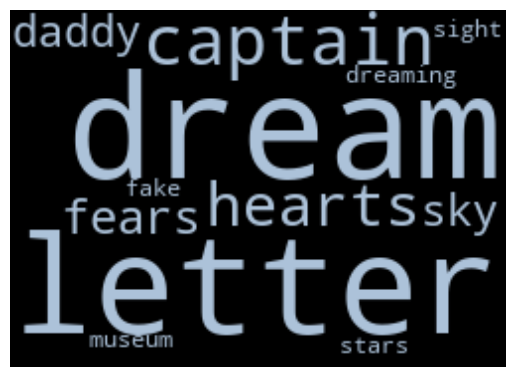

Topic 2


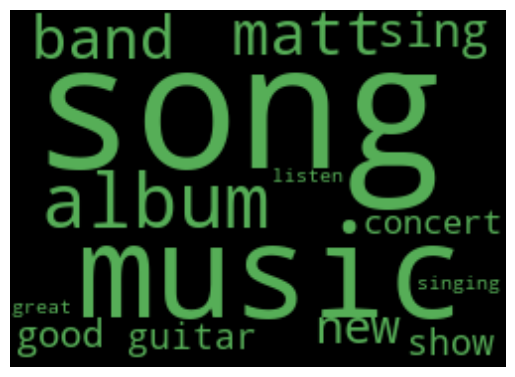

Topic 3


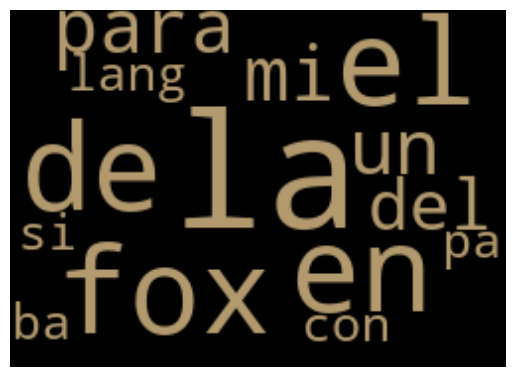

Topic 4


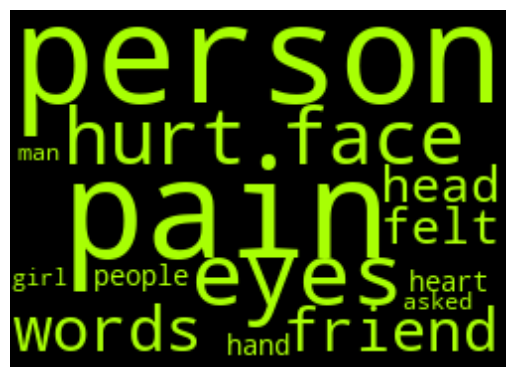

Topic 5


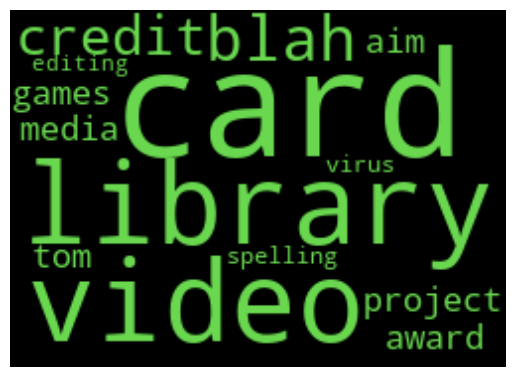

Topic 6


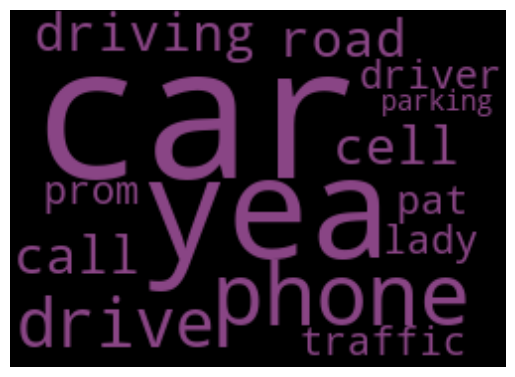

Topic 7


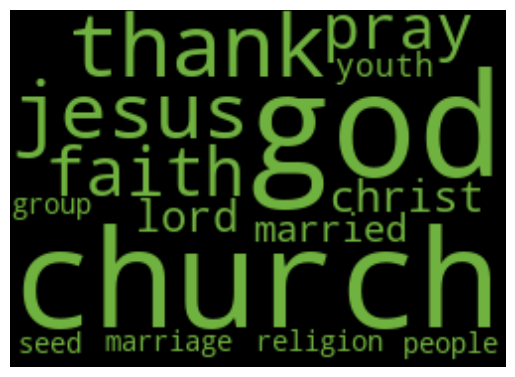

Topic 8


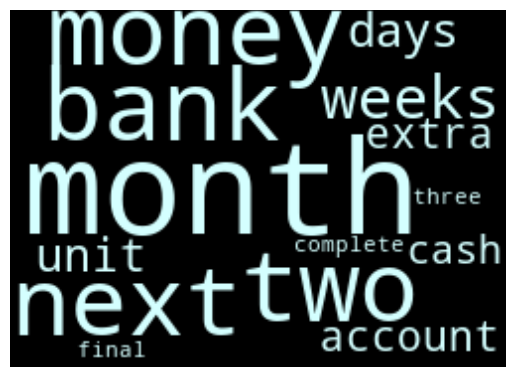

Topic 9


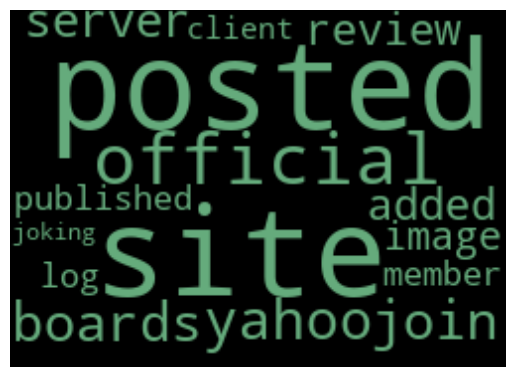

Topic 10


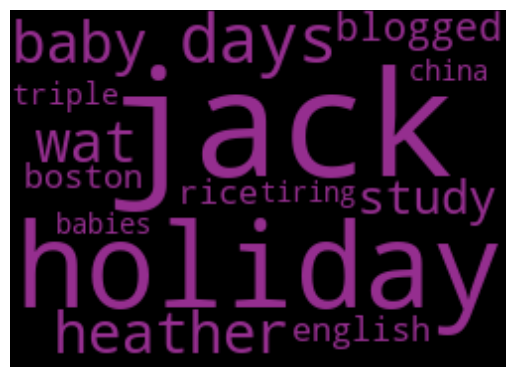

Topic 11


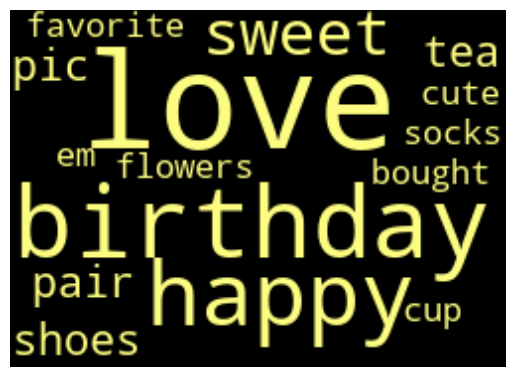

Topic 12


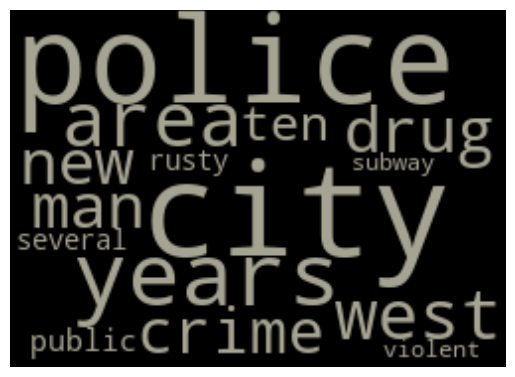

Topic 13


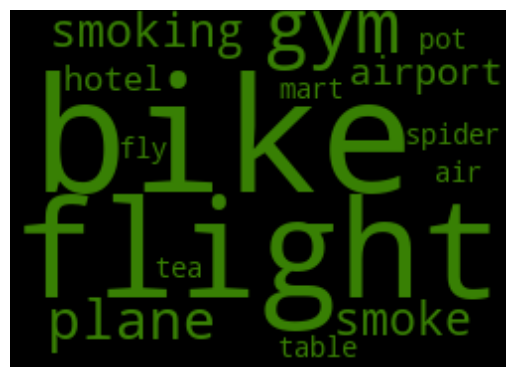

Topic 14


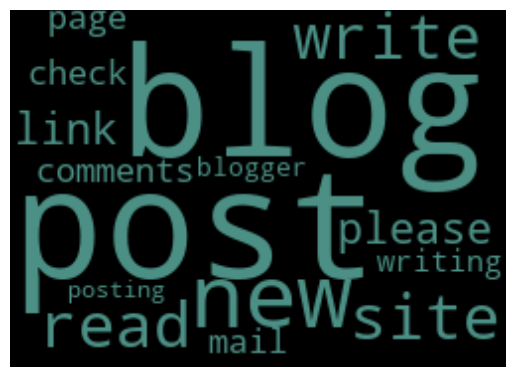

Topic 15


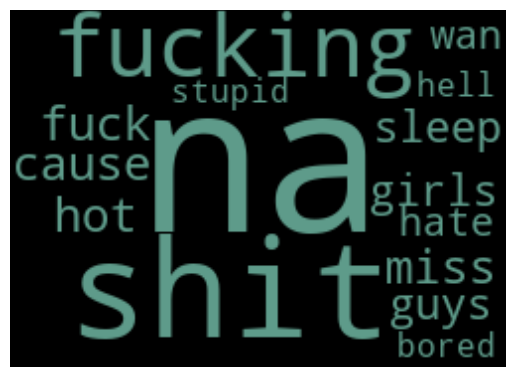

Topic 16


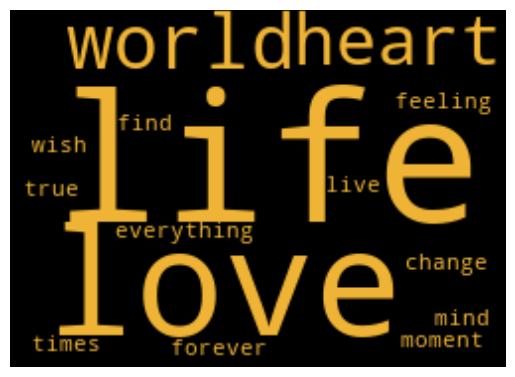

Topic 17


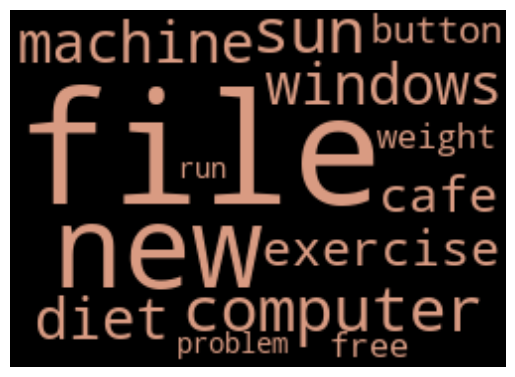

Topic 18


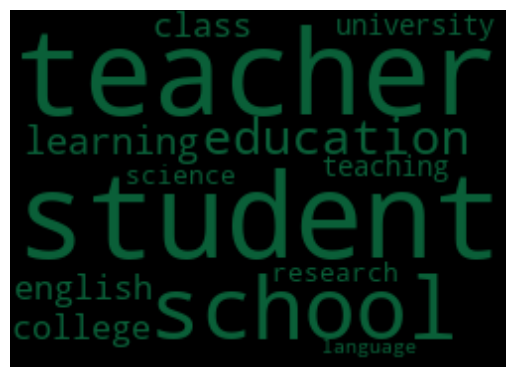

Topic 19


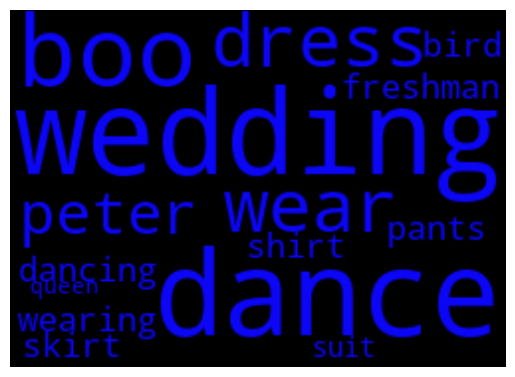

Topic 20


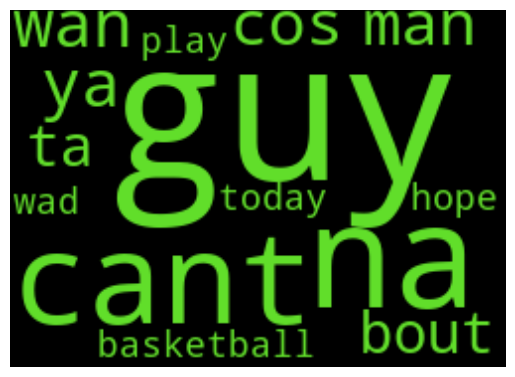

Topic 21


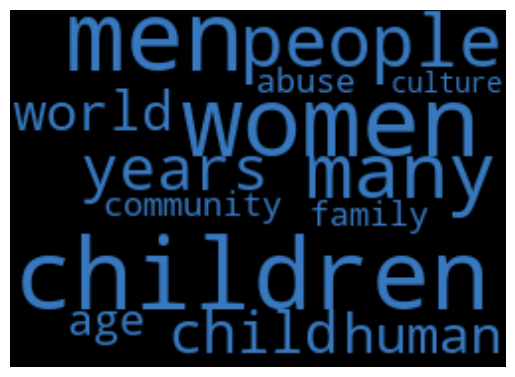

Topic 22


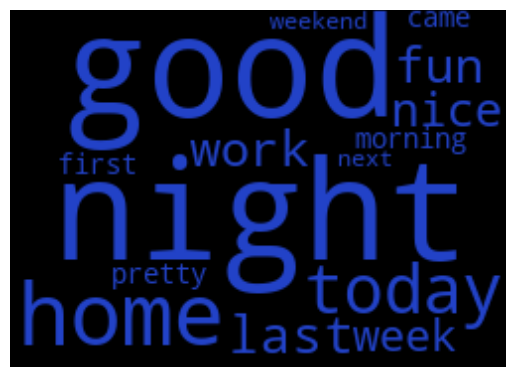

Topic 23


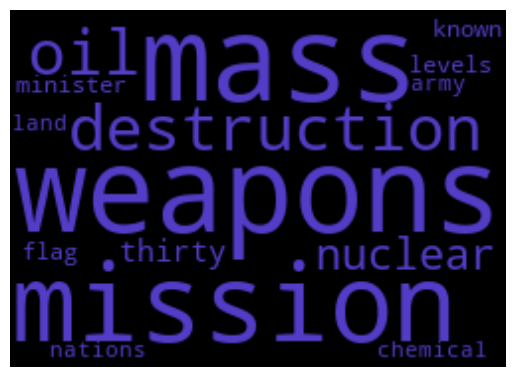

Topic 24


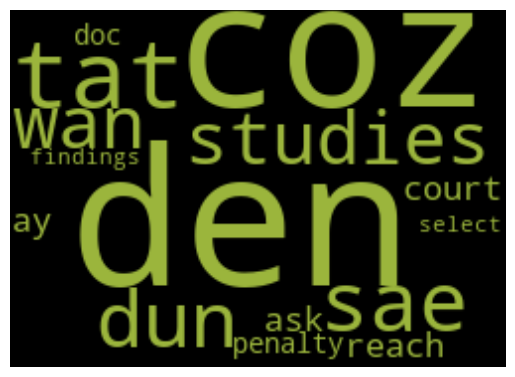

Topic 25


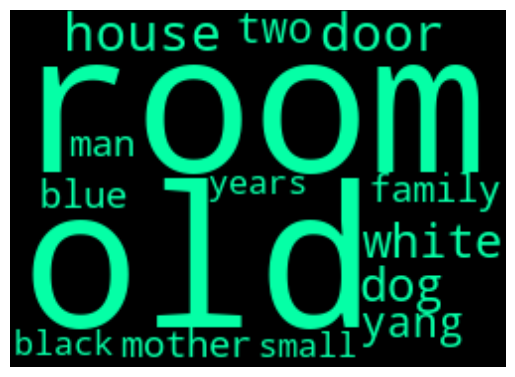

Topic 26


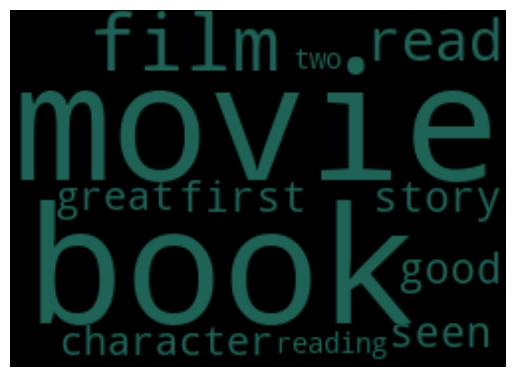

Topic 27


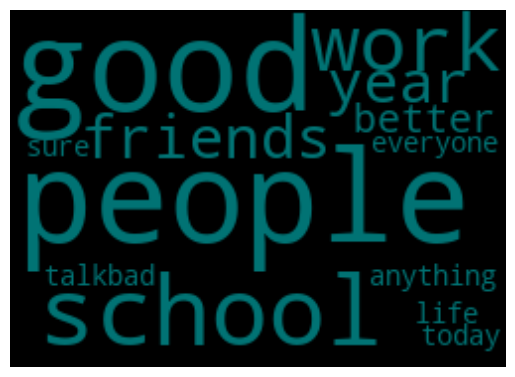

Topic 28


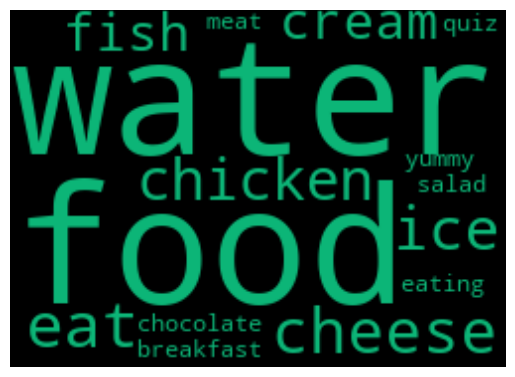

Topic 29


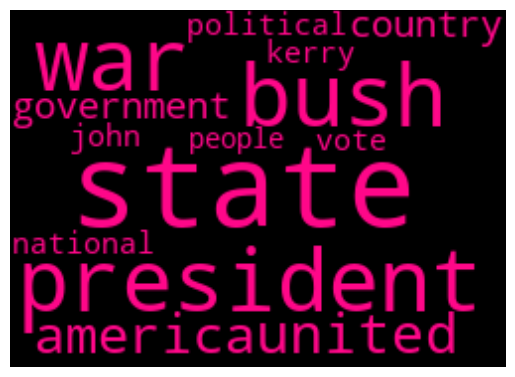

Topic 30


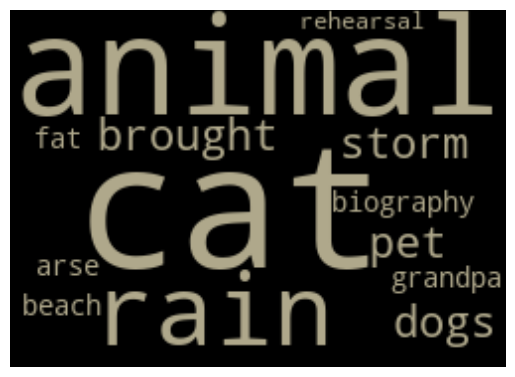

Topic 31


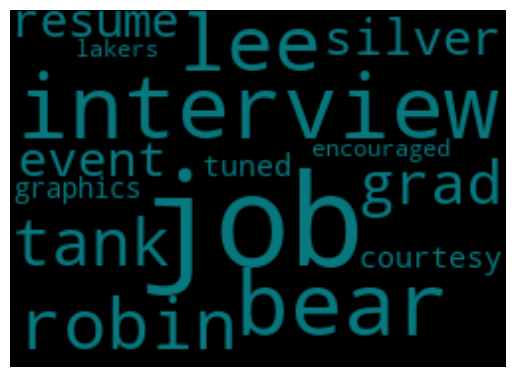

Topic 32


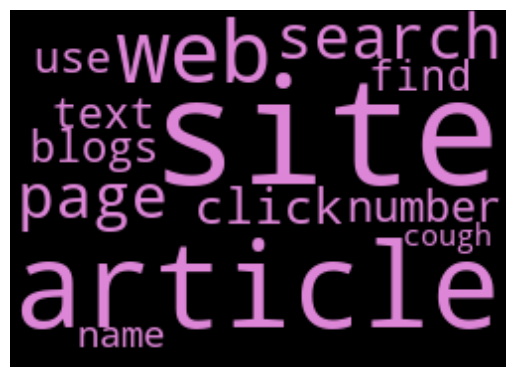

Topic 33


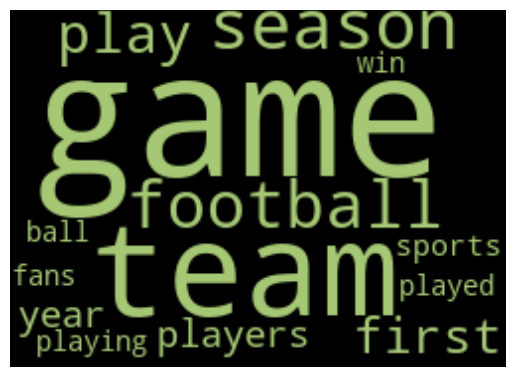

Topic 34


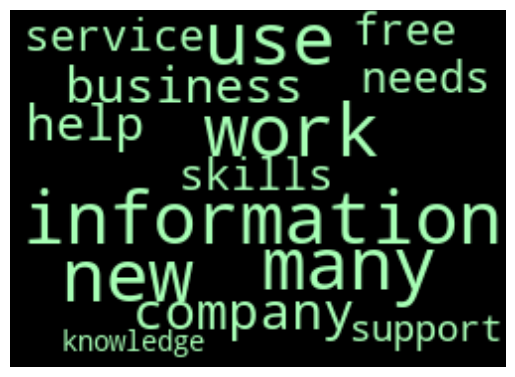

Topic 35


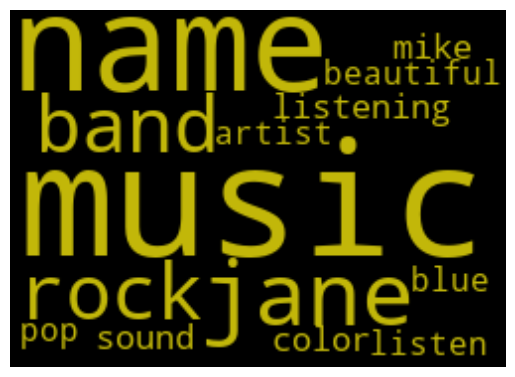

Topic 36


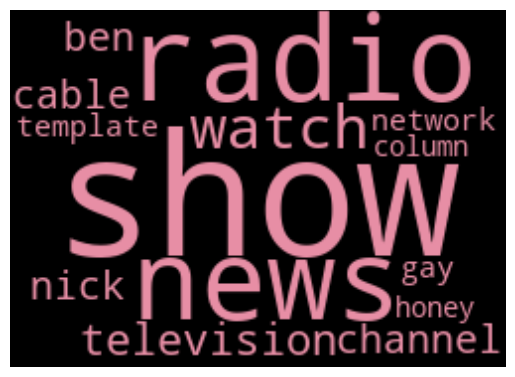

Topic 37


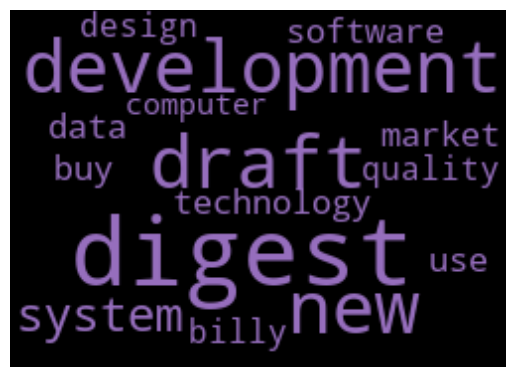

Topic 38


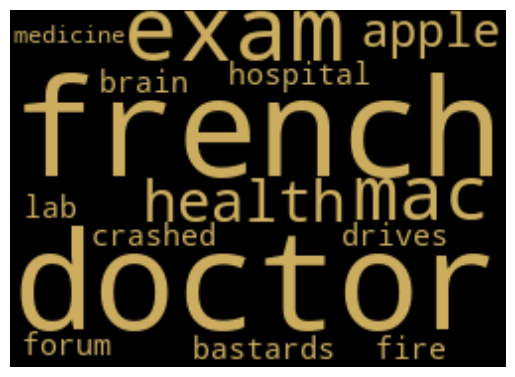

Topic 39


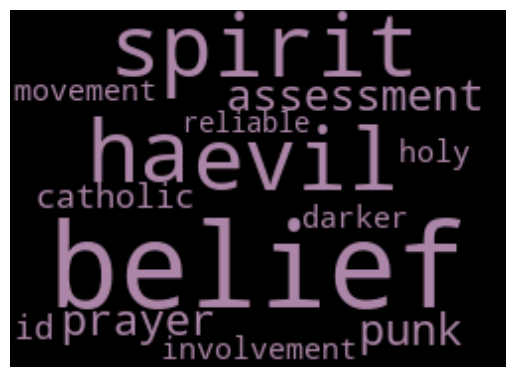

In [10]:
#Generating word clouds for each topic

colours = [color for name, color in mcolors.XKCD_COLORS.items()]

for i in range(num_topics):    #Printing only for the first 5 for now
    wordcloud = WordCloud(width=250, height=180, 
                          color_func=lambda *args, **kwargs: colours[i], 
                          prefer_horizontal=1.0).generate(str(topic_words[i]))
    
    print ("Topic", i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
#Trying to find the dominant topic and its percentage contribution in each document

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    #Init output
    sent_topics_df = pd.DataFrame()

    #Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        #print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        #Get the Dominant topic, Percentage Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prob in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), (str(round(100*(prop_topic)))+"%"), topic_keywords]), ignore_index=True)   
            else:
                break

    #Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)
df_topic_sents_keywords.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_topic_sents_keywords

Dominant_Topic Topic_Perc_Contrib  \
0                  13                22%   
1                  13                34%   
2                  22                16%   
3                  35                31%   
4                  34                20%   
...               ...                ...   
31493              21                40%   
31494              21                52%   
31495              21                60%   
31496              21                67%   
31497              21                40%   

                                                Keywords  \
0      blog, post, new, read, site, write, please, li...   
1      blog, post, new, read, site, write, please, li...   
2      weapons, mass, mission, destruction, oil, nucl...   
3      show, radio, news, watch, television, channel,...   
4      music, name, jane, band, rock, listening, soun...   
...                                                  ...   
31493  good, night, home, today, last, work, fun, nic...   
31494  good, night, home, today, last, work, fun, nic...   
31495  good, night, home, today, last, work, fun, nic...   
31496  good, night, home, today, last, work, fun, nic...   
31497  good, night, home, today, last, work, fun, nic...   

                                                    Text  
0      [info, found, pages, files, wait, team, leader...  
1                 [team, members, van, mail, mail, mail]  
2      [het, van, op, build, bomb, rec, humor, subjec...  
3                                     [testing, testing]  
4      [thanks, yahoo, capture, means, show, cool, li...  
...                                                  ...  
31493                         [bought, send, home, work]  
31494                      [wed, work, sent, work, sent]  
31495  [mon, zing, place, cooked, dinner, together, f...  
31496  [sun, place, zing, present, raffles, centre, d...  
31497                        [met, ping, dinner, breeks]  

[31498 rows x 4 columns]

In [12]:
#t-SNE Clustering Chart

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

#Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list])

#Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

#Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1)>0.35]

#Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

#tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

#Plotting the topic clusters
output_notebook()
n_topics = num_topics
mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), outer_width=900, outer_height=700)
plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12462 samples in 0.041s...
[t-SNE] Computed neighbors for 12462 samples in 0.784s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12462
[t-SNE] Computed conditional probabilities for sample 2000 / 12462
[t-SNE] Computed conditional probabilities for sample 3000 / 12462
[t-SNE] Computed conditional probabilities for sample 4000 / 12462
[t-SNE] Computed conditional probabilities for sample 5000 / 12462
[t-SNE] Computed conditional probabilities for sample 6000 / 12462
[t-SNE] Computed conditional probabilities for sample 7000 / 12462
[t-SNE] Computed conditional probabilities for sample 8000 / 12462
[t-SNE] Computed conditional probabilities for sample 9000 / 12462
[t-SNE] Computed conditional probabilities for sample 10000 / 12462
[t-SNE] Computed conditional probabilities for sample 11000 / 12462
[t-SNE] Computed conditional probabilities for sample 12000 / 12462
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...

# Using the model on unseen data

In [13]:
words = open('Words.txt')
word = []

for line in words:
    word.append(line.strip())
    
print (len(word))
word

113850


['aa',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'aal',
 'aalii',
 'aaliis',
 'aals',
 'aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'aas',
 'aasvogel',
 'aasvogels',
 'aba',
 'abaca',
 'abacas',
 'abaci',
 'aback',
 'abacus',
 'abacuses',
 'abaft',
 'abaka',
 'abakas',
 'abalone',
 'abalones',
 'abamp',
 'abampere',
 'abamperes',
 'abamps',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonments',
 'abandons',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasement',
 'abasements',
 'abaser',
 'abasers',
 'abases',
 'abash',
 'abashed',
 'abashes',
 'abashing',
 'abasing',
 'abatable',
 'abate',
 'abated',
 'abatement',
 'abatements',
 'abater',
 'abaters',
 'abates',
 'abating',
 'abatis',
 'abatises',
 'abator',
 'abators',
 'abattis',
 'abattises',
 'abattoir',
 'abattoirs',
 'abaxial',
 'abaxile',
 'abbacies',
 'abbacy',
 'abbatial',
 'abbe',
 'abbes',
 'abbess',
 'abbesses',
 'abbey',
 'abbeys',
 'abbot',
 'abbotcies',
 'abbotcy',
 'abbots',
 'abbreviate',
 '

In [14]:
stops = open('Stopwords.txt')
stop = []

for line in stops:
    stop.append(line.strip())
    
print (len(stop))
stop

349


['a',
 'about',
 'above',
 'absolutely',
 'actually',
 'after',
 'again',
 'against',
 'ah',
 'ain',
 'aint',
 "ain't",
 'all',
 'also',
 'although',
 'always',
 'am',
 'an',
 'and',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anyway',
 'anywho',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'away',
 'b',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'c',
 'can',
 'certainly',
 'come',
 'could',
 'coulda',
 'couldn',
 "couldn't",
 'd',
 'day',
 'definitely',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'e',
 'each',
 'eh',
 'else',
 'even',
 'ever',
 'every',
 'f',
 'feel',
 'few',
 'for',
 'from',
 'further',
 'g',
 'get',
 'give',
 'go',
 'goes',
 'going',
 'gon',
 "gon'",
 'gonna',
 'got',
 'gotta',
 'h',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hello',
 '

In [15]:
#Defining a text preprocessing method here

lemmatizer = WordNetLemmatizer()
clean_text = []

def preprocess(text):   
    #New stopwords function, tokenize and lemmatize (remove punctuation before tokenization)
    text = text.lower()
    text = strip_punctuation(text) 
    text = strip_numeric(text)
    text = word_tokenize(text)
    text = [w for w in text if w in word]    
    text = [a for a in text if a not in stop]
    text = " ".join(text)
    text = lemmatizer.lemmatize(text)

    clean_text.append(text)
    return text

egtext = "Hello, aaaah then this is 1 trial of the above function oh hrfjnfjm!"

print (preprocess(egtext)) #TRIAL SUCCESSFUL

trial function


In [16]:
text = "I travelled to a land of wizards, dragons, witches, magicians and sorcerers. This was a land of magic and fantasy."
textp = preprocess(text)
textp

'travelled land wizards dragons witches magicians sorcerers land magic fantasy'

In [17]:
tokens = []
for i in textp.split():
    tokens.append(i)
    
print(text)
print(textp)
bow_vector = id2word.doc2bow(tokens)

result = pd.DataFrame(lda_model[bow_vector])
result.rename(columns = {0:'Topic Number', 1:'Probability'}, inplace = True)

result = result.sort_values(by='Probability', ascending=False)
result.reset_index(drop=True, inplace=True)

result    #Program takes about 13 minutes to run up to here

I travelled to a land of wizards, dragons, witches, magicians and sorcerers. This was a land of magic and fantasy.
travelled land wizards dragons witches magicians sorcerers land magic fantasy


Topic Number  Probability
0            22     0.163909
1            34     0.141500
2            24     0.122061
3             8     0.119022
4            21     0.092741
5            38     0.090053

# Extra

In [18]:
dfjoin = []
for i in range(len(df)):
    for j in range(len(df[i])):
        dfjoin.append(df[i][j])
len(set(dfjoin))    #Number of unique words

39181

In [19]:
dataset['topic'].value_counts()    #Distribution of blogs by topic

Student                    10392
Technology                  4259
Education                   2606
Arts                        1799
Fashion                     1775
Communications-Media        1541
Internet                    1371
Engineering                 1362
Science                      673
Government                   588
Non-Profit                   484
Manufacturing                440
BusinessServices             405
Marketing                    403
Law                          301
Museums-Libraries            282
Banking                      273
Advertising                  266
Religion                     251
Accounting                   241
Publishing                   204
Consulting                   199
Transportation               190
Military                     188
LawEnforcement-Security      121
Sports-Recreation            118
Automotive                   116
Biotech                      101
InvestmentBanking             83
HumanResources                79
Agricultur

In [27]:
topic_words2 = []
for topic, terms in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=25):
    topic_words2.append((preprocess(terms)).split())
    
topic_words2 = [j for sub in topic_words2 for j in sub]
topic_diversity = len(set(topic_words2))/len(topic_words2)

print('Topic Diversity: ', topic_diversity)    #Topic Diversity 
#(as defined in Dieng, A. B., Ruiz, F. J., & Blei, D. M. (2020). Topic modeling in embedding spaces. Transactions of the Association for Computational Linguistics, 8, 439-453.)

Topic Diversity:  0.8676923076923077
